In [13]:
import pandas as pd
from importlib import reload

from src import constants as C
from archive.matching_mess import participant_scan_patterns as P
from src.viz import visualisations_scan_patterns as PV
from src.statistics import preference_matching as PM
from src.viz import visualisations as V

reload(P)
reload(PV)
reload(PM)

<module 'src.statistics.preference_matching' from 'C:\\Users\\deeth\\PycharmProjects\\QA_eyetracking\\src\\statistics\\preference_matching.py'>

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [14]:
trial_pref_dwell = PM.compute_trial_matching(
    hunters,
    metric_col=C.MEAN_DWELL_TIME,
    direction="high",
    extreme_mode="polarity",
)
trial_pref_dwell

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,B,matching,0,932.000000,1186.000000,375.166667,618.600000
1,3,l10_39,D,A,not_matching,0,326.555556,93.727273,53.428571,296.333333
2,3,l11_342,A,A,matching,1,134.333333,39.666667,0.000000,0.000000
3,3,l11_40,A,A,matching,1,274.750000,41.166667,72.571429,0.000000
4,3,l14_349,A,A,matching,1,209.333333,65.750000,24.800000,26.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,101.333333,204.333333,143.500000,249.000000
9715,93,l5_175,A,D,not_matching,1,168.000000,62.600000,93.600000,357.600000
9716,94,l5_175,A,A,matching,1,493.625000,122.111111,48.166667,61.857143
9717,95,l5_175,A,A,matching,1,255.500000,226.555556,71.250000,65.166667


In [15]:
trial_pref_rel_dt = PM.compute_trial_matching(
    hunters,
    metric_col=C.MEAN_DWELL_TIME,
    extreme_mode="relative",
)
trial_pref_rel_dt

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,B,matching,0,932.000000,1186.000000,375.166667,618.600000
1,3,l10_39,D,C,not_matching,0,326.555556,93.727273,53.428571,296.333333
2,3,l11_342,A,A,matching,1,134.333333,39.666667,0.000000,0.000000
3,3,l11_40,A,A,matching,1,274.750000,41.166667,72.571429,0.000000
4,3,l14_349,A,A,matching,1,209.333333,65.750000,24.800000,26.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,101.333333,204.333333,143.500000,249.000000
9715,93,l5_175,A,D,not_matching,1,168.000000,62.600000,93.600000,357.600000
9716,94,l5_175,A,A,matching,1,493.625000,122.111111,48.166667,61.857143
9717,95,l5_175,A,A,matching,1,255.500000,226.555556,71.250000,65.166667


In [16]:
base_cols = [
    C.TRIAL_ID,
    C.PARTICIPANT_ID,
    "selected_label",
    "pred_label",
    "pref_group",
    "A", "B", "C", "D",
]

df_pol = trial_pref_dwell[base_cols].rename(
    columns={
        "pred_label": "pred_label_polarity",
        "pref_group": "pref_group_polarity",
    }
)

df_rel = trial_pref_rel_dt[
    [
        C.TRIAL_ID,
        C.PARTICIPANT_ID,
        "pred_label",
        "pref_group",
    ]
].rename(
    columns={
        "pred_label": "pred_label_relative",
        "pref_group": "pref_group_relative",
    }
)

cmp = df_pol.merge(
    df_rel,
    on=[C.TRIAL_ID, C.PARTICIPANT_ID],
    how="inner",
)


diff = cmp[
    cmp["pref_group_polarity"] != cmp["pref_group_relative"]
]
diff


,TRIAL_INDEX,participant_id,selected_label,pred_label_polarity,pref_group_polarity,A,B,C,D,pred_label_relative,pref_group_relative
9,3,l17_48,A,A,matching,343.666667,312.000000,309.333333,137.750000,D,not_matching
26,3,l27_377,C,B,not_matching,901.666667,926.333333,275.333333,300.000000,C,matching
33,3,l2_65,D,D,matching,241.333333,168.142857,108.000000,286.400000,C,not_matching
40,3,l32_389,A,A,matching,1002.583333,857.000000,834.777778,245.625000,D,not_matching
42,3,l33_258,A,A,matching,168.444444,142.375000,75.800000,104.000000,C,not_matching
...,...,...,...,...,...,...,...,...,...,...,...
9686,80,l52_2023,A,A,matching,109.714286,95.600000,0.000000,52.000000,C,not_matching
9687,81,l13_206,A,A,matching,201.571429,82.333333,0.000000,122.285714,C,not_matching
9688,81,l18_526,A,D,not_matching,71.000000,78.666667,82.800000,88.857143,A,matching
9693,82,l52_2023,A,A,matching,84.600000,37.333333,57.733333,79.000000,B,not_matching


In [17]:
trial_pref_skip = PM.compute_trial_matching(
    hunters,
    metric_col=C.SKIP_RATE,
    direction="low",
    extreme_mode="polarity",
)
trial_pref_skip

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,A,not_matching,0,0.000000,0.000000,0.166667,0.200000
1,3,l10_39,D,A,not_matching,0,0.333333,0.545455,0.714286,0.444444
2,3,l11_342,A,A,matching,1,0.000000,0.666667,1.000000,1.000000
3,3,l11_40,A,A,matching,1,0.375000,0.666667,0.571429,1.000000
4,3,l14_349,A,A,matching,1,0.333333,0.500000,0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,0.666667,0.333333,0.500000,0.000000
9715,93,l5_175,A,A,matching,1,0.000000,0.600000,0.500000,0.400000
9716,94,l5_175,A,A,matching,1,0.125000,0.444444,0.666667,0.571429
9717,95,l5_175,A,B,not_matching,1,0.333333,0.000000,0.500000,0.500000


In [18]:
trial_pref_rel_sr = PM.compute_trial_matching(
    hunters,
    metric_col=C.SKIP_RATE,
    extreme_mode="relative",
)
trial_pref_rel_sr

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,D,not_matching,0,0.000000,0.000000,0.166667,0.200000
1,3,l10_39,D,C,not_matching,0,0.333333,0.545455,0.714286,0.444444
2,3,l11_342,A,A,matching,1,0.000000,0.666667,1.000000,1.000000
3,3,l11_40,A,D,not_matching,1,0.375000,0.666667,0.571429,1.000000
4,3,l14_349,A,A,matching,1,0.333333,0.500000,0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,0.666667,0.333333,0.500000,0.000000
9715,93,l5_175,A,A,matching,1,0.000000,0.600000,0.500000,0.400000
9716,94,l5_175,A,A,matching,1,0.125000,0.444444,0.666667,0.571429
9717,95,l5_175,A,B,not_matching,1,0.333333,0.000000,0.500000,0.500000


,pref_group,n_trials,n_correct,acc,ci_low,ci_high
0,matching,6196,5427,0.875888,0.867444,0.883865
1,not_matching,3523,3022,0.857792,0.845868,0.868936


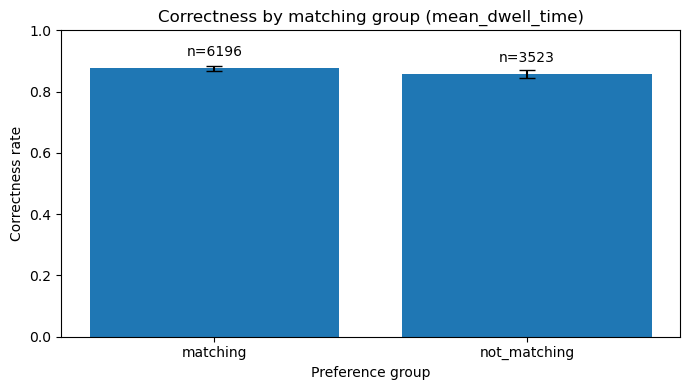

In [19]:
V.plot_correctness_by_matching(
    trial_pref_dwell,
    metric_name=C.MEAN_DWELL_TIME,
)

In [17]:
results = P.run_trial_preference_screening(
    hunters,
    gatherers,
    metric=C.MEAN_FIRST_FIXATION_DURATION,
    uniform_rel_range=0.10,
    save=True,
)

hunters_trials = results["hunters"]
gatherers_trials = results["gatherers"]

     participant_id  trial_index    answer_A    answer_B    answer_C  \
0           l10_338            3  300.000000  171.000000  131.333333   
1           l10_338            4  202.500000  208.500000  138.500000   
2           l10_338            5   64.600000   84.714286   84.600000   
3           l10_338            6   99.200000  137.000000  168.250000   
4           l10_338            7  106.333333   89.307692   96.250000   
...             ...          ...         ...         ...         ...   
9714         l9_536           68  160.000000  104.500000   99.500000   
9715         l9_536           69   73.800000   59.750000   94.666667   
9716         l9_536           70  139.571429   95.833333  114.333333   
9717         l9_536           71   80.666667   54.769231  101.875000   
9718         l9_536           72  107.666667  121.090909   71.250000   

        answer_D selected_label  is_correct  rel_range  preference_strength  \
0     137.200000              B           0   0.912287  

In [4]:
print("Hunters:")
print(P.compute_global_preference_stats(hunters_trials))


Hunters:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          9719         24        4617        5078      0.002469   

   prop_mismatch  prop_matching  
0       0.475049       0.522482  


In [5]:
print("\nGatherers:")
print(P.compute_global_preference_stats(gatherers_trials))


Gatherers:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          9717         24        4984        4709       0.00247   

   prop_mismatch  prop_matching  
0       0.512916       0.484615  


In [6]:
hunters_pp = P.compute_participant_preference_summary(hunters_trials)
gatherers_pp = P.compute_participant_preference_summary(gatherers_trials)

corr_hunters = P.correctness_by_group(hunters_trials)
corr_gatherers = P.correctness_by_group(gatherers_trials)

print("\nHunters correctness:")
print(corr_hunters)

print("\nGatherers correctness:")
print(corr_gatherers)



Hunters correctness:
  pref_group  correct_rate  n_trials  n_correct
0   matching         0.880      5078       4469
1   mismatch         0.858      4617       3963
2    uniform         0.708        24         17

Gatherers correctness:
  pref_group  correct_rate  n_trials  n_correct
0   matching         0.817      4709       3847
1   mismatch         0.808      4984       4026
2    uniform         0.708        24         17


In [ ]:
thresholds = [0.10, 0.15, 0.20]
metrics = C.AREA_METRIC_COLUMNS
#metrics = [C.IA_AVERAGE_FIX_PUPIL_SIZE]

all_corr = []

for metric in metrics:
    for thr in thresholds:
        print("\n" + "=" * 80)
        print(f"METRIC = {metric} | uniform_rel_range = {thr:.2f}")
        print("=" * 80)

        results = P.run_trial_preference_screening(
            hunters,
            gatherers,
            metric=metric,
            uniform_rel_range=thr,
            save=True,
        )

        hunters_pref = results["hunters"]
        gatherers_pref = results["gatherers"]

        print("Hunters pref stats:")
        print(P.compute_global_preference_stats(hunters_pref))

        print("\nGatherers pref stats:")
        print(P.compute_global_preference_stats(gatherers_pref))

        if C.IS_CORRECT_COLUMN in hunters_pref.columns:
            corr_h = P.correctness_by_group(hunters_pref).assign(group="hunters", metric=metric, uniform_rel_range=thr)
            corr_g = P.correctness_by_group(gatherers_pref).assign(group="gatherers", metric=metric, uniform_rel_range=thr)
            all_corr.append(corr_h)
            all_corr.append(corr_g)

            PV.plot_correctness_by_group(hunters_pref, label="Hunters", metric=metric, uniform_rel_range=thr, save=True)
            PV.plot_correctness_by_group(gatherers_pref, label="Gatherers", metric=metric, uniform_rel_range=thr, save=True)
        else:
            print(f"NOTE: {C.IS_CORRECT_COLUMN} not present; skipping correctness + plots.")


if all_corr:
    corr_summary = pd.concat(all_corr, ignore_index=True)
    corr_summary

#just look matching vc rest
#then we can look at distance from second

In [8]:
hunters_merged = hunters.copy()
hunters_merged["group"] = "hunters"

gatherers_merged = gatherers.copy()
gatherers_merged["group"] = "gatherers"

merged = pd.concat([hunters_merged, gatherers_merged], ignore_index=True)



MERGED | METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.10
Merged pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0         16388      10586        4128        1674       0.64596   

   prop_mismatch  prop_matching                     metric  uniform_rel_range  
0       0.251892       0.102148  IA_AVERAGE_FIX_PUPIL_SIZE                0.1  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


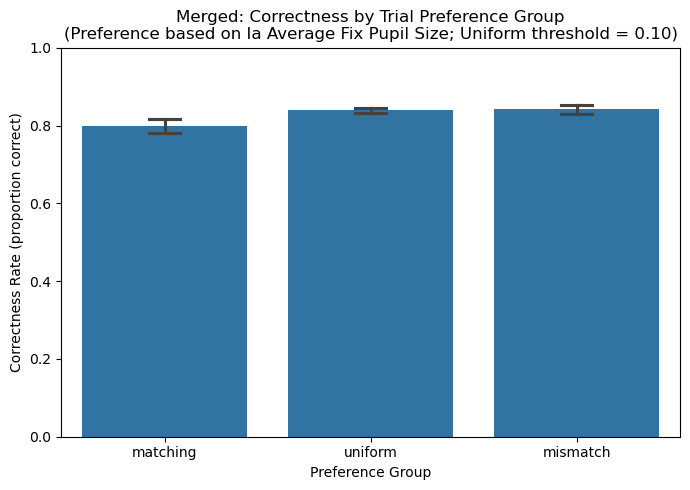


MERGED | METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.15
Merged pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0         16388      13004        2464         920      0.793507   

   prop_mismatch  prop_matching                     metric  uniform_rel_range  
0       0.150354       0.056139  IA_AVERAGE_FIX_PUPIL_SIZE               0.15  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


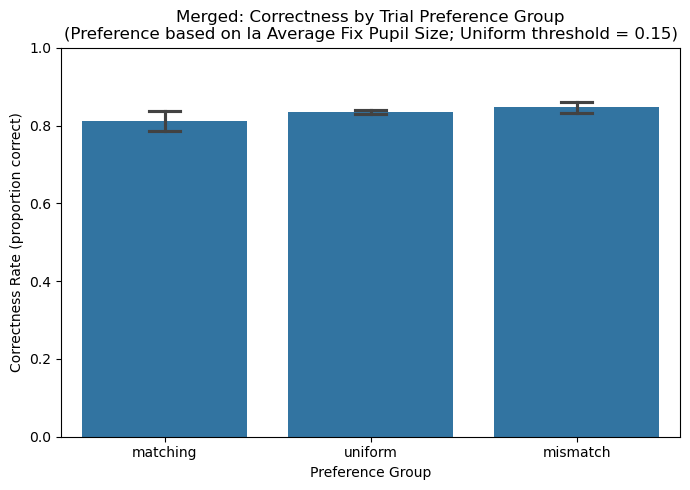


MERGED | METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.20
Merged pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0         16388      14583        1312         493      0.889858   

   prop_mismatch  prop_matching                     metric  uniform_rel_range  
0       0.080059       0.030083  IA_AVERAGE_FIX_PUPIL_SIZE                0.2  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


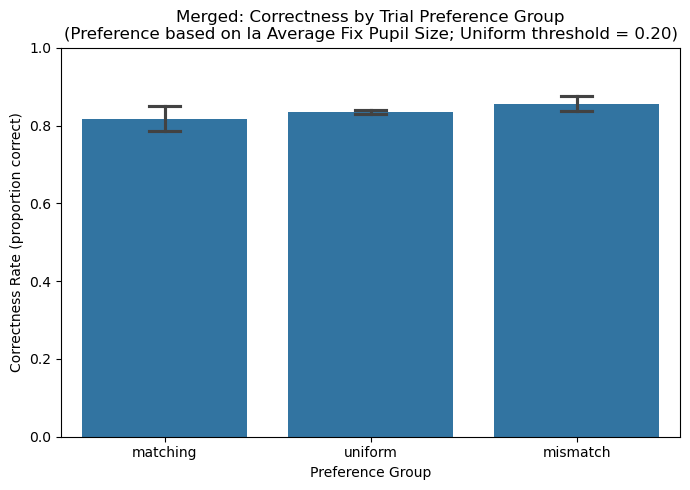

(   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
 0         16388      10586        4128        1674      0.645960   
 1         16388      13004        2464         920      0.793507   
 2         16388      14583        1312         493      0.889858   
 
    prop_mismatch  prop_matching                     metric  uniform_rel_range  
 0       0.251892       0.102148  IA_AVERAGE_FIX_PUPIL_SIZE               0.10  
 1       0.150354       0.056139  IA_AVERAGE_FIX_PUPIL_SIZE               0.15  
 2       0.080059       0.030083  IA_AVERAGE_FIX_PUPIL_SIZE               0.20  ,
   pref_group  correct_rate  n_trials  n_correct                     metric  \
 0   matching         0.799      1674       1337  IA_AVERAGE_FIX_PUPIL_SIZE   
 1   mismatch         0.841      4128       3473  IA_AVERAGE_FIX_PUPIL_SIZE   
 2    uniform         0.839     10586       8882  IA_AVERAGE_FIX_PUPIL_SIZE   
 3   matching         0.812       920        747  IA_AVERAGE_FIX_PUPIL_SIZE   
 4

In [9]:
thresholds = [0.10, 0.15, 0.20]
#metrics = C.AREA_METRIC_COLUMNS
metrics = [C.IA_AVERAGE_FIX_PUPIL_SIZE]

all_corr = []
all_pref_stats = []

for metric in metrics:
    for thr in thresholds:
        print("\n" + "=" * 80)
        print(f"MERGED | METRIC = {metric} | uniform_rel_range = {thr:.2f}")
        print("=" * 80)

        merged_pref = P.compute_trial_preference_stats(
            merged,
            metric=metric,
            uniform_rel_range=thr,
        )

        pref_stats = P.compute_global_preference_stats(merged_pref)
        pref_stats["metric"] = metric
        pref_stats["uniform_rel_range"] = thr
        all_pref_stats.append(pref_stats)

        print("Merged pref stats:")
        print(pref_stats)

        if C.IS_CORRECT_COLUMN in merged_pref.columns:
            corr = P.correctness_by_group(merged_pref)
            corr["metric"] = metric
            corr["uniform_rel_range"] = thr
            corr["group"] = "merged"
            all_corr.append(corr)

            PV.plot_correctness_by_group(
                merged_pref,
                label="Merged",
                metric=metric,
                uniform_rel_range=thr,
                save=True,
            )
        else:
            print(f"NOTE: {C.IS_CORRECT_COLUMN} not present; skipping correctness + plots.")

pref_summary = pd.concat(all_pref_stats, ignore_index=True) if all_pref_stats else None
corr_summary = pd.concat(all_corr, ignore_index=True) if all_corr else None

pref_summary, corr_summary

In [12]:
from archive.matching_mess.preference_correctness_tests import pairwise_correctness_tests

stat_metrics = C.AREA_METRIC_COLUMNS

all_stats = []

for metric in stat_metrics:
    #for thr in [0.15]:
    for thr in [0.10, 0.15, 0.20]:
        results = P.run_trial_preference_screening(
            hunters,
            gatherers,
            metric=metric,
            uniform_rel_range=thr,
            save=True,
        )

        # hunters
        all_stats.append(
            pairwise_correctness_tests(
                results["hunters"],
                metric=metric,
                uniform_rel_range=thr,
                group_label="hunters",
            )
        )

        # gatherers
        all_stats.append(
            pairwise_correctness_tests(
                results["gatherers"],
                metric=metric,
                uniform_rel_range=thr,
                group_label="gatherers",
            )
        )

stats_summary = pd.concat(all_stats, ignore_index=True)
stats_summary


,metric,uniform_rel_range,group,comparison,g1,g2,test_used,test_stat,p_value,correct_rate_g1,correct_rate_g2,delta_correctness,n_trials_g1,n_trials_g2,n_correct_g1,n_correct_g2,p_fdr,significant
0,mean_dwell_time,0.1,hunters,matching_vs_uniform,matching,uniform,fisher,0.504464,1.000000,0.8760,0.9333,-0.0574,6192,15,5424,14,1.000000,False
1,mean_dwell_time,0.1,hunters,matching_vs_mismatch,matching,mismatch,chi2,6.837183,0.008928,0.8760,0.8573,0.0186,6192,3512,5424,3011,0.026784,True
2,mean_dwell_time,0.1,hunters,uniform_vs_mismatch,uniform,mismatch,fisher,2.329459,0.710391,0.9333,0.8573,0.0760,15,3512,14,3011,1.000000,False
3,mean_dwell_time,0.1,gatherers,matching_vs_uniform,matching,uniform,fisher,0.907707,1.000000,0.8194,0.8333,-0.0139,5893,12,4829,10,1.000000,False
4,mean_dwell_time,0.1,gatherers,matching_vs_mismatch,matching,mismatch,chi2,5.518634,0.018815,0.8194,0.8004,0.0191,5893,3812,4829,3051,0.056445,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,first_encounter_avg_pupil_size,0.2,hunters,matching_vs_mismatch,matching,mismatch,chi2,1.488123,0.222508,0.8563,0.8770,-0.0207,494,1788,423,1568,0.452581,False
158,first_encounter_avg_pupil_size,0.2,hunters,uniform_vs_mismatch,uniform,mismatch,chi2,0.995581,0.318382,0.8681,0.8770,-0.0088,7423,1788,6444,1568,0.452581,False
159,first_encounter_avg_pupil_size,0.2,gatherers,matching_vs_uniform,matching,uniform,chi2,4.284217,0.038468,0.8356,0.8002,0.0354,584,7106,488,5686,0.057702,False
160,first_encounter_avg_pupil_size,0.2,gatherers,matching_vs_mismatch,matching,mismatch,chi2,0.486905,0.485311,0.8356,0.8475,-0.0119,584,2013,488,1706,0.485311,False


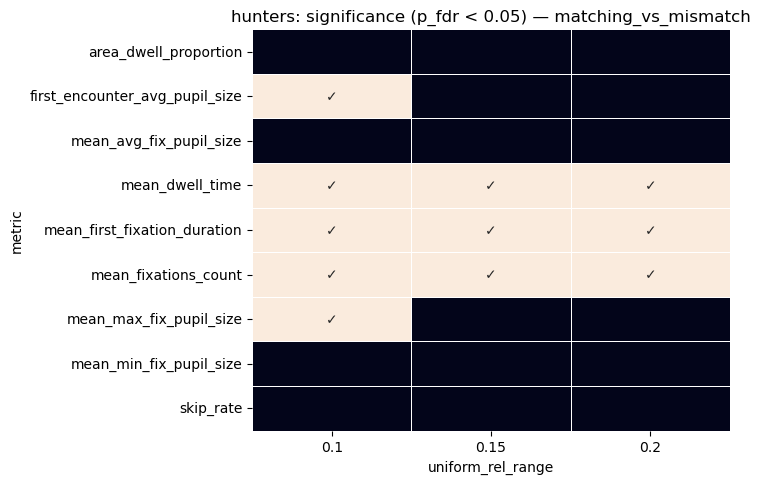

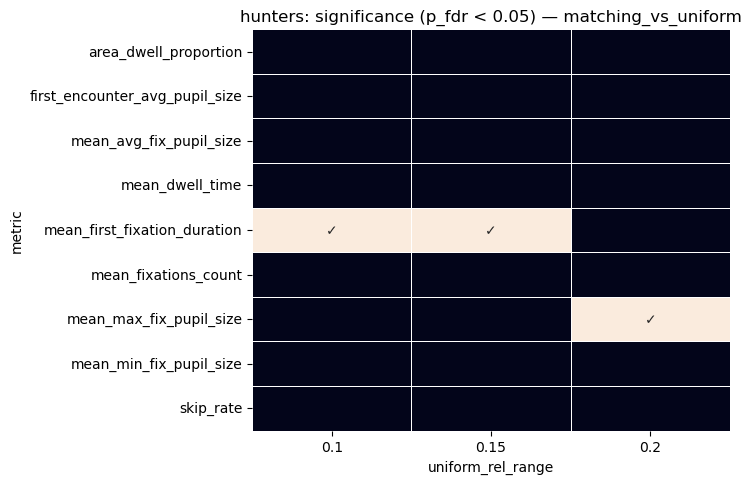

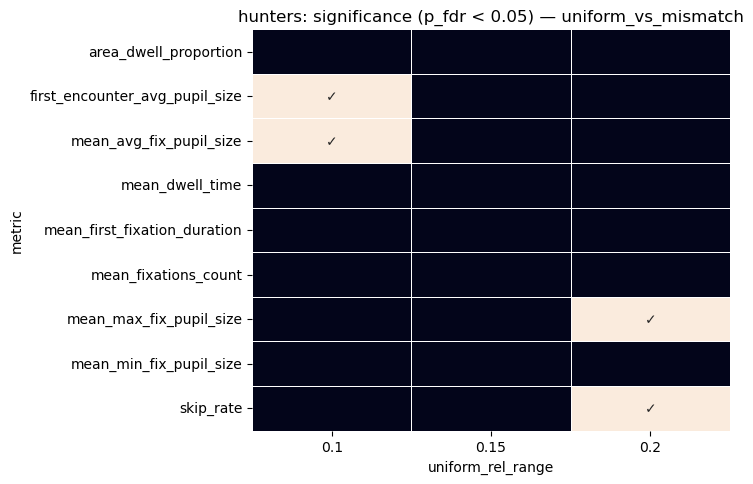

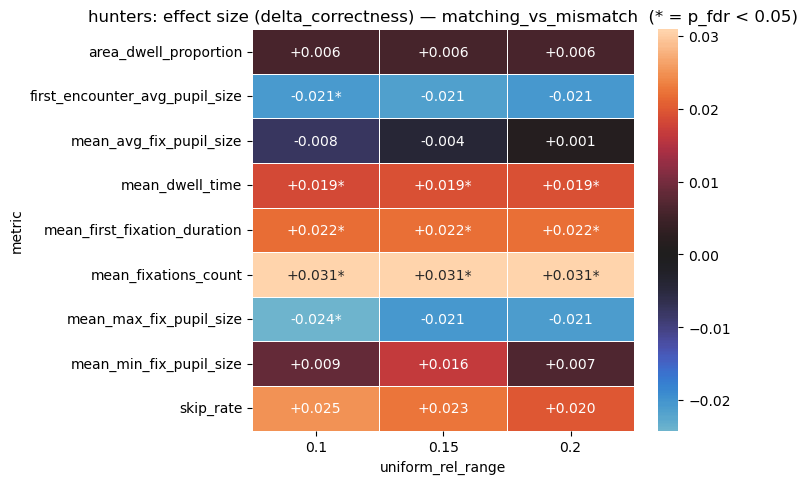

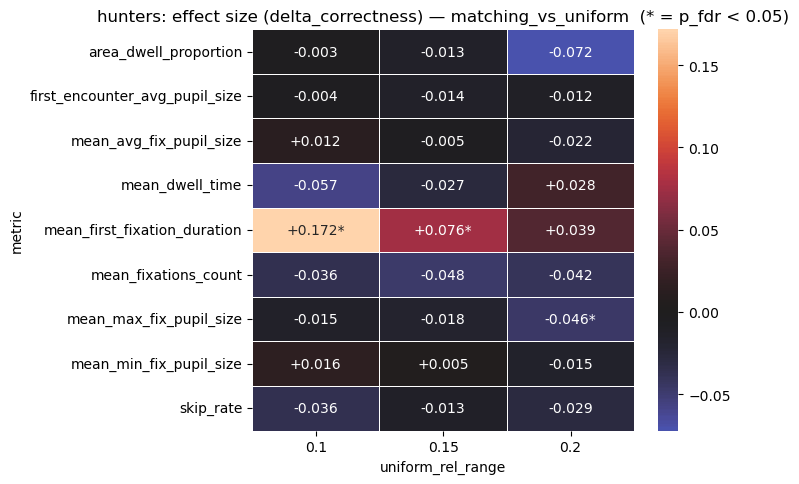

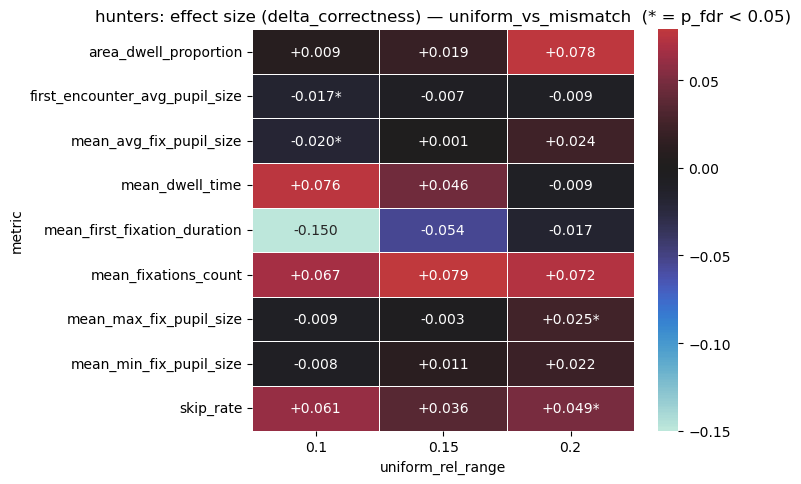

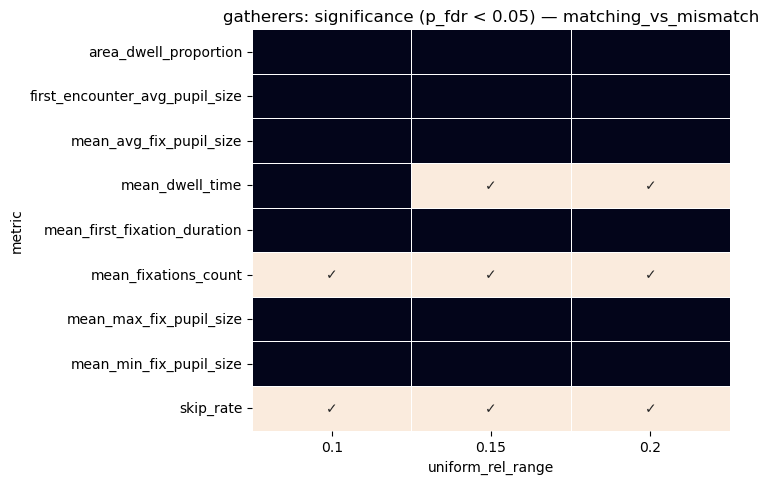

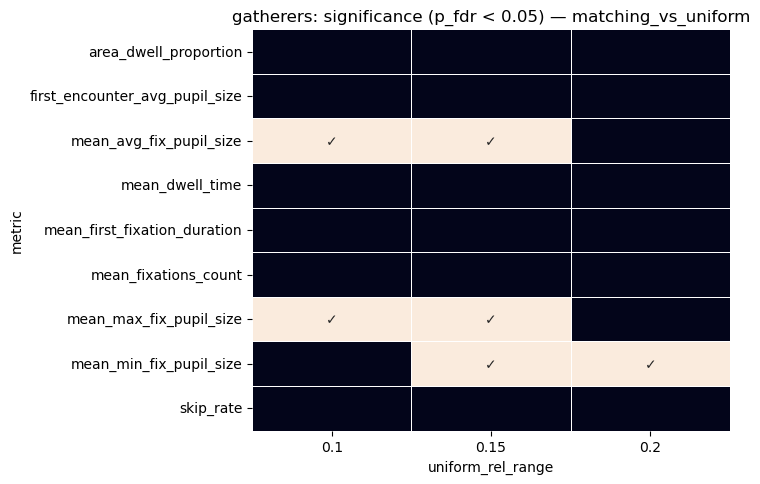

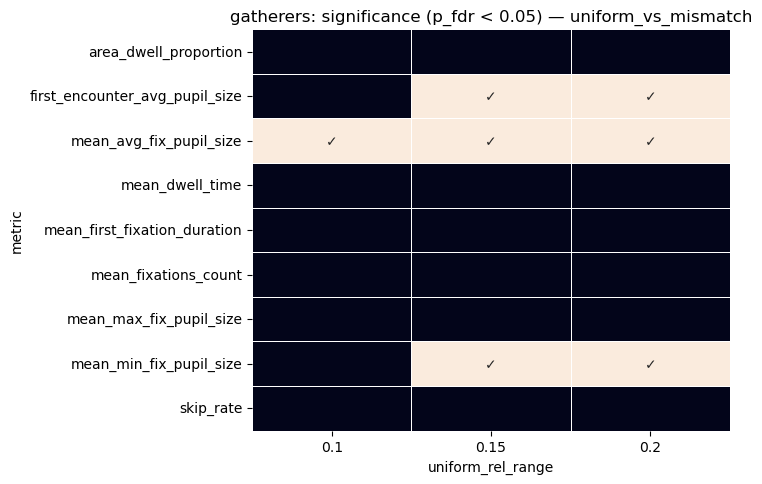

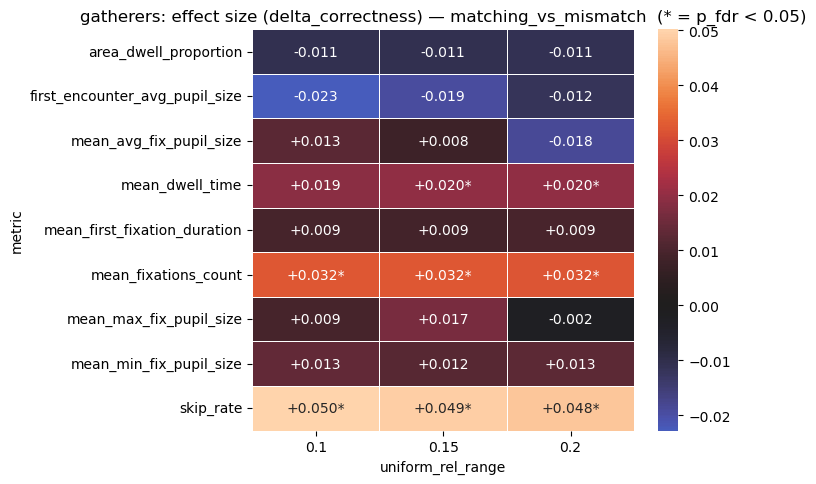

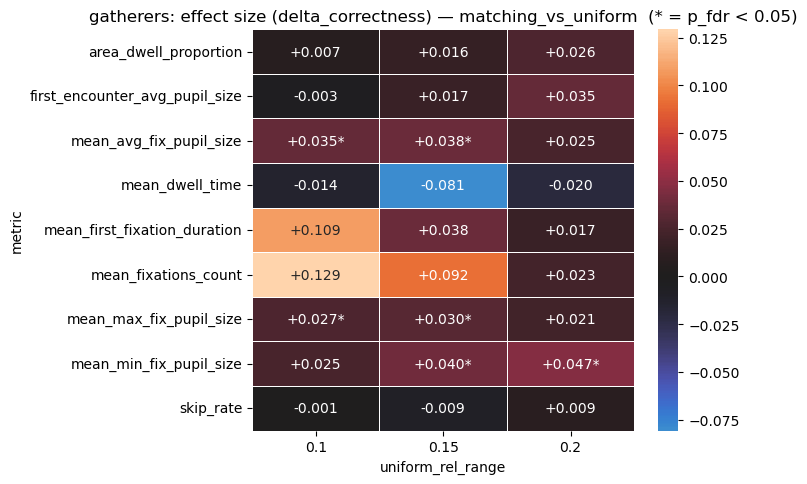

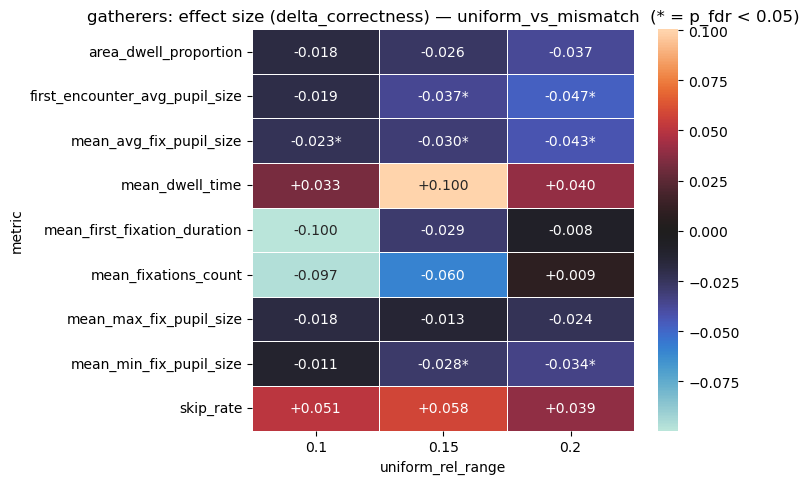

In [13]:
from archive.matching_mess.visualisations_preference_correctness_tests import (
    plot_pairwise_correctness_significance_heatmaps,
    plot_pairwise_correctness_effect_heatmaps,
)

stats_summary["uniform_rel_range"] = stats_summary["uniform_rel_range"].astype(float).round(2)
plot_pairwise_correctness_significance_heatmaps(
    stats_summary,
    group="hunters",
    use_p="p_fdr",
    alpha=0.05,
    save=True,
)

plot_pairwise_correctness_effect_heatmaps(
    stats_summary,
    group="hunters",
    signif_col="p_fdr",
    alpha=0.05,
    save=True,
)

# repeat for gatherers / merged
plot_pairwise_correctness_significance_heatmaps(stats_summary, group="gatherers", save=True)
plot_pairwise_correctness_effect_heatmaps(stats_summary, group="gatherers", save=True)

# plot_pairwise_correctness_significance_heatmaps(stats_summary, group="merged", save=True)
# plot_pairwise_correctness_effect_heatmaps(stats_summary, group="merged", save=True)
